In [ ]:

from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
X = load_boston().data
Y = load_boston().target

In [ ]:
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(data = X_train, columns=load_boston().feature_names)
X_train['Price'] = list(y_train)  
X_test = pd.DataFrame(data = X_test, columns=load_boston().feature_names)
X_test['Price'] = list(y_test)

In [ ]:
#implementing SGD
def sgd_regressor(X, y, learning_rate=0.2, n_epochs=1000, k=40):
    
    w = np.random.randn(1,13)  # Randomly initializing weights
    b = np.random.randn(1,1)   # Random intercept value
    
    epoch=1
    
    while epoch <= n_epochs:
        
        temp = X.sample(k)

        X_tr = temp.iloc[:,0:13].values
        y_tr = temp.iloc[:,-1].values
        
        Lw = w
        Lb = b
        
        loss = 0
        y_pred = []
        sq_loss = []
        
        for i in range(k):
              
            Lw = (-2/k * X_tr[i]) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            Lb = (-2/k) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            
            w = w - learning_rate * Lw
            b = b - learning_rate * Lb
            
            y_predicted = np.dot(X_tr[i],w.T)
            y_pred.append(y_predicted)
        
        loss = mean_squared_error(y_pred, y_tr)
            
        print("Epoch: %d, Loss: %.3f" %(epoch, loss))
        epoch+=1
        learning_rate = learning_rate/1.02
        
    return w,b

In [ ]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        temp_ = x
        X_test = temp_.iloc[:,0:13].values
        y = np.asscalar(np.dot(w,X_test[i])+b)
        y_pred.append(y)
    return np.array(y_pred)
w,b = sgd_regressor(X_train,y_train)
y_pred_customsgd = predict(X_test,w,b)

Epoch: 1, Loss: 383.244
Epoch: 2, Loss: 365.845
Epoch: 3, Loss: 458.917
Epoch: 4, Loss: 475.277
Epoch: 5, Loss: 483.184
Epoch: 6, Loss: 562.400
Epoch: 7, Loss: 508.856
Epoch: 8, Loss: 545.516
Epoch: 9, Loss: 512.837
Epoch: 10, Loss: 492.797
Epoch: 11, Loss: 512.043
Epoch: 12, Loss: 550.974
Epoch: 13, Loss: 559.208
Epoch: 14, Loss: 496.791
Epoch: 15, Loss: 521.983
Epoch: 16, Loss: 534.136
Epoch: 17, Loss: 536.458
Epoch: 18, Loss: 484.877
Epoch: 19, Loss: 530.997
Epoch: 20, Loss: 538.971
Epoch: 21, Loss: 499.510
Epoch: 22, Loss: 544.611
Epoch: 23, Loss: 503.628
Epoch: 24, Loss: 517.131
Epoch: 25, Loss: 574.063
Epoch: 26, Loss: 543.278
Epoch: 27, Loss: 495.457
Epoch: 28, Loss: 530.495
Epoch: 29, Loss: 492.461
Epoch: 30, Loss: 516.538
Epoch: 31, Loss: 514.650
Epoch: 32, Loss: 510.049
Epoch: 33, Loss: 555.921
Epoch: 34, Loss: 550.978
Epoch: 35, Loss: 495.404
Epoch: 36, Loss: 541.939
Epoch: 37, Loss: 547.100
Epoch: 38, Loss: 538.349
Epoch: 39, Loss: 489.903
Epoch: 40, Loss: 565.353
Epoch: 41

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  


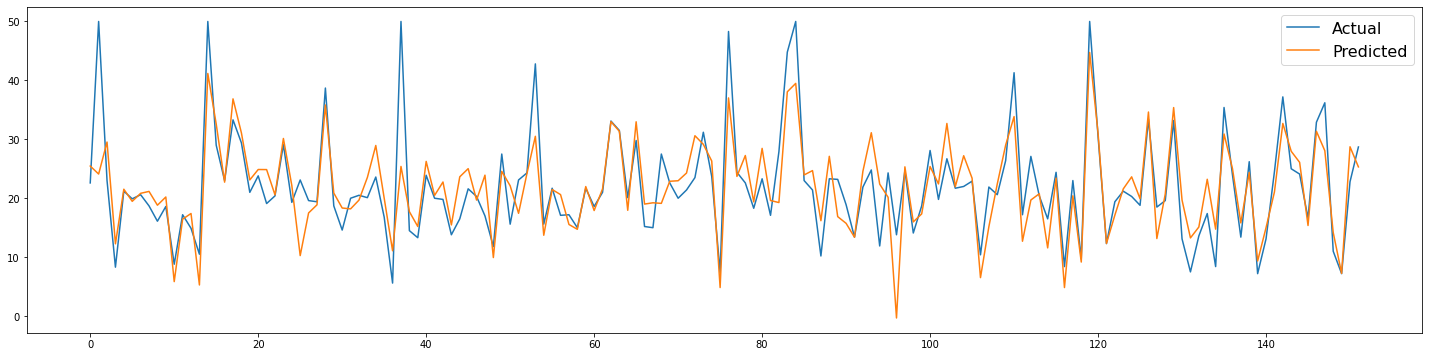

Mean Squared Error : 27.06562034027186


In [ ]:
from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_customsgd, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd))

In [ ]:
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

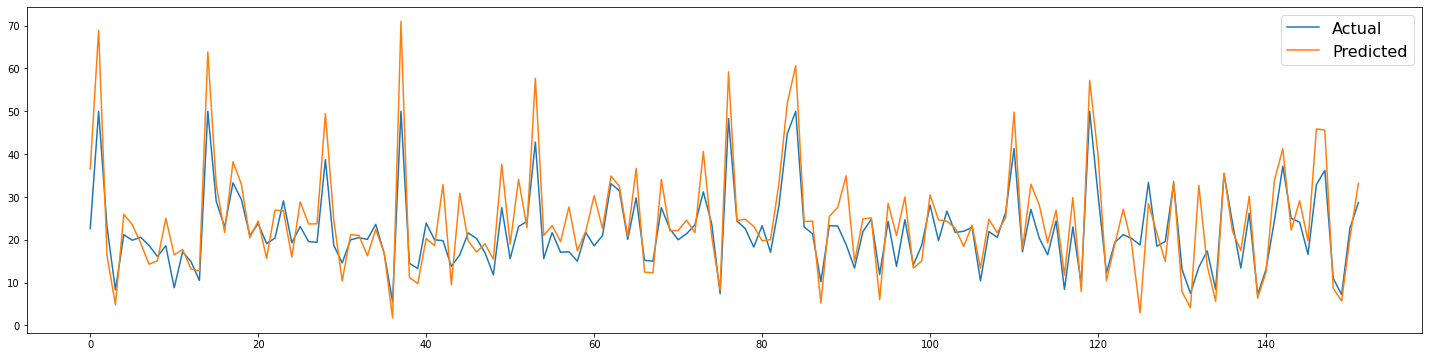

Mean Squared Error : 38.00534350266894


In [ ]:
#Comparing our Predicted Values v/s the Actual Values
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

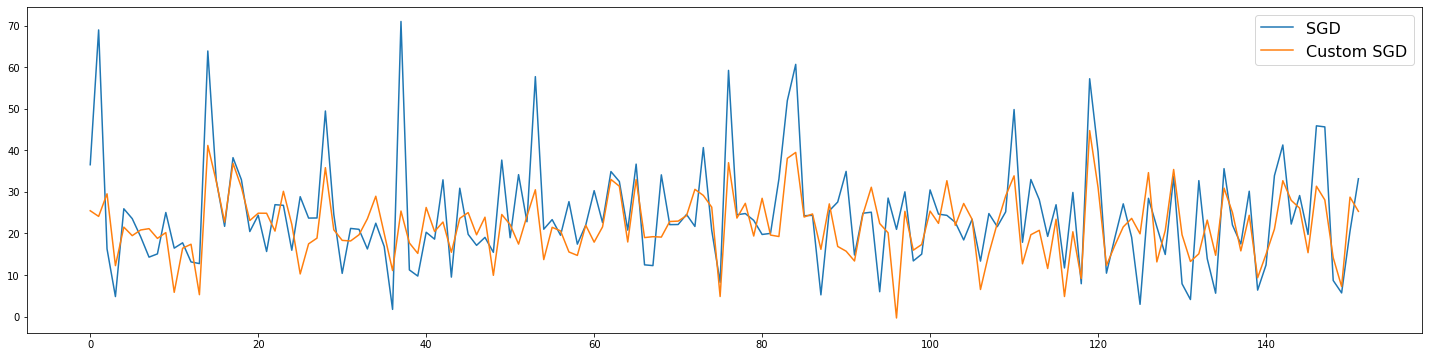

Mean Squared Error of Custom SGD : 27.06562034027186
Mean Squared Error of SKlearn's SGD : 38.00534350266894


In [ ]:
#Comparing Predicted Values for both SGD Classifiers
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_pred, label='SGD')
plt.plot(y_pred_customsgd, label='Custom SGD')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error of Custom SGD :',mean_squared_error(y_test, y_pred_customsgd))
print("Mean Squared Error of SKlearn's SGD :",mean_squared_error(y_test, y_pred))